***in this notebook we need to access the model we built and the previous work that we have done over the days. so you either copy you this notebook to the one where you built your model, or you copy the other notebooks to this one.***


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'spam.tsv')
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
spam = data[data['label'] == 'spam']
ham = data[data['label'] == 'ham']

In [4]:
# Down sampling
ham = ham.sample(n = len(spam))
ham.head()

,label,message,length,punct
3959,ham,So i could kiss and feel you next to me...,42,3
1004,ham,&lt;#&gt; am I think? Should say on syllabus,45,6
3734,ham,Old Orchard near univ. How about you?,37,2
4368,ham,I like dis sweater fr mango but no more my siz...,70,1
1279,ham,Can i meet ü at 5.. As 4 where depends on wher...,64,4


In [5]:
df = ham.append(spam, ignore_index=True)
df.head()

,label,message,length,punct
0,ham,So i could kiss and feel you next to me...,42,3
1,ham,&lt;#&gt; am I think? Should say on syllabus,45,6
2,ham,Old Orchard near univ. How about you?,37,2
3,ham,I like dis sweater fr mango but no more my siz...,70,1
4,ham,Can i meet ü at 5.. As 4 where depends on wher...,64,4


In [6]:
clf = Pipeline([('tfidf' ,TfidfVectorizer()),
                ('estimator', SVC(C=100 , gamma='scale') )
    
])

In [7]:
X = df['message']
Y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3)

In [8]:
clf.fit(X_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('estimator', SVC(C=100))])

In [9]:
y_pred = clf.predict(X_test)

recall= 0.9375


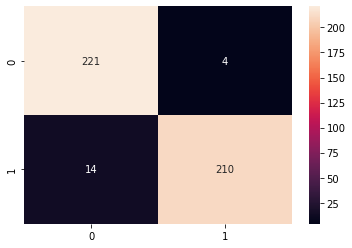

In [10]:
cmf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cmf_matrix, annot=True, fmt= 'd')
print('recall=',cmf_matrix[1,1]/(cmf_matrix[1,0]+cmf_matrix[1,1]))

In [11]:
clf.score(X_test , y_test)

0.9599109131403119

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       225
        spam       0.98      0.94      0.96       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# saving the model 
first we need to download the model on our local machine

this is done by using a library called pickle, it's used to serialize and deserialize python objects.

In [13]:
import pickle

In [14]:
#print your model's score
score = clf.score(X_test , y_test)
score

0.9599109131403119

In [15]:
# we will store the model using pickle and reload it again,
# then check the accuaracy from the reloaded model just to make sure it's the same one.

saved_model=pickle.dumps(clf)
modelfrom_pickle = pickle.loads(saved_model) 
score_from_pickle = modelfrom_pickle.score(X_test , y_test)
score_from_pickle

0.9599109131403119

the accuracy scores should be the same.

now we need to store the model in a file and download this file locally.

In [16]:
#the below code generates a file and stores the model in it.
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

open your colab files and you should see a file named "finalized_model.sav".
if you don't see it click the refresh button.
finally, right-click the file and download it.

# create the App

By following these steps we now have the model stored on a file on our machine. all we need to do now is to create a web app that uses our model to predict and link it to simple interface to interact with, very basic html files.

download the zipped file sent to your email, it includes 3 files: 

this_app.py

home11.html

result11.html



note that for the following steps, you need to have python installed on your local machines.

open the "this_app.py" using VSCode or anyother editor. you will see that we are importing some libraries at the beginning of the file, so first we need to install these libraries on our machines, since they are not there by default.
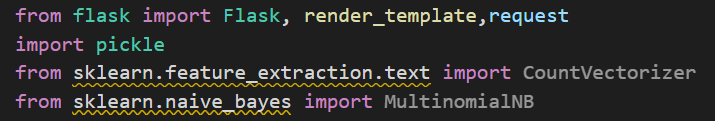

on VSCode terminal -or on the cmd if you are not using VSCode- put the following commands, one by one, to install the packages.

pip install flask

pip install pickle

pip install sklearn

wait for each of the packages to be installed.

we're gonna use pickle to deserialize the file that we downloaded from colab.
this line handles it.
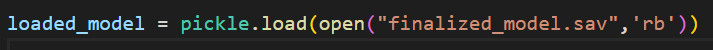

if you changed the name of the file on colab, change it here as well to the same name.

now run "this_app.py" and in the terminal you will find the local ip that is hosting your app. the line should look like this.


```
 * Running on http://127.0.0.1:5000
```
you may need to scroll up through other warning lines in the terminal to find this line. and don't worry about the warnings, it's fine as long as they are not errors.. yet 😜



copy the url and go to your web browser and paste it. if everything went fine..  hopefuly 😆

 you should see this page.

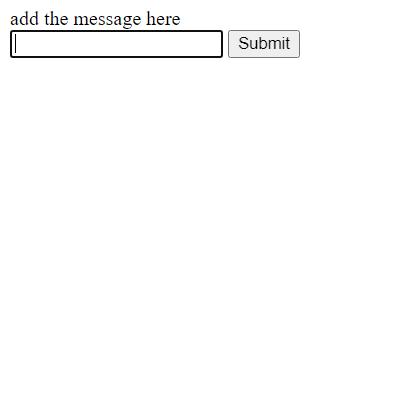

and we're done!
put a message in the box and click submit, it will foroward you to the result of prediction.

congratulations! you just finished your project 🎆🎆

<center><img src="https://i.imgur.com/l5Yr3vV.png" width="30%">
